In [1]:
# ==============================================================================
# Step 1: Setup and Load Data
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data files from the previous outlier removal step
X_train = pd.read_csv('X_train_no_outliers.csv')
X_test = pd.read_csv('X_test_original.csv')
y_train = pd.read_csv('y_train_no_outliers.csv').squeeze()
y_test = pd.read_csv('y_test_original.csv').squeeze()

print(" Data files from outlier removal step loaded successfully.")
print("Shape of training data before scaling:", X_train.shape)

 Data files from outlier removal step loaded successfully.
Shape of training data before scaling: (17411, 16)


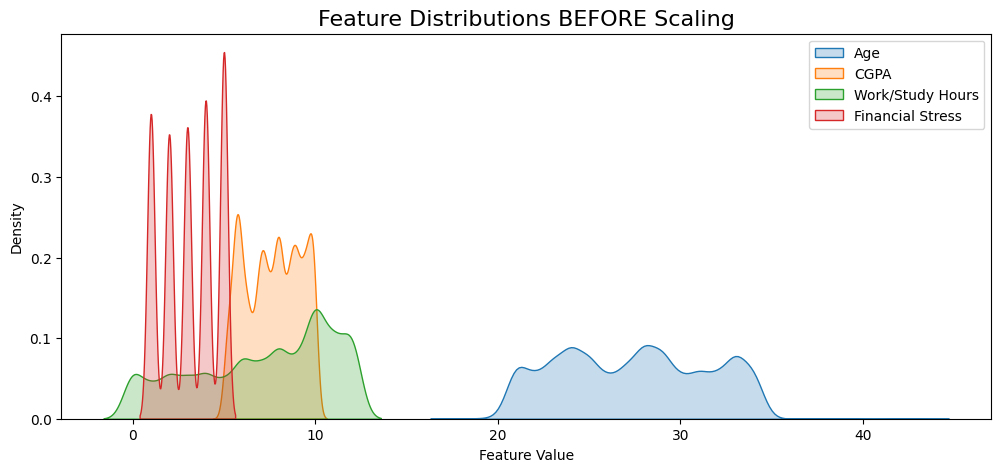

In [2]:
# ==============================================================================
# Step 2: EDA - Visualize Feature Distributions (Before Scaling)
# ==============================================================================
# Select the same key numerical features for consistency
features_to_plot = ['Age', 'CGPA', 'Work/Study Hours', 'Financial Stress']

plt.figure(figsize=(12, 5))
plt.title("Feature Distributions BEFORE Scaling", fontsize=16)
for feature in features_to_plot:
    sns.kdeplot(X_train[feature], label=feature, fill=True)
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [3]:
# ==============================================================================
# Step 3: Apply StandardScaler to Numerical Features
# ==============================================================================
print("\n--- Applying StandardScaler ---")

# Initialize the scaler
scaler = StandardScaler()

# Identify all numerical columns to be scaled
numerical_cols = X_train.select_dtypes(include=np.number).columns

# Fit the scaler on the TRAINING data and transform it
# This learns the mean and std dev from the training set only
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])

# Use the SAME fitted scaler to transform the TEST data
# We do NOT fit again on the test data to avoid data leakage
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Convert the scaled arrays back to DataFrames to keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_cols)

print("Scaling complete. Displaying the first 5 rows of the scaled training data:")
display(X_train_scaled.head())


--- Applying StandardScaler ---
Scaling complete. Displaying the first 5 rows of the scaled training data:


,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0.889111,0.151151,-1.402300,-2.220446e-16,-0.779413,0.0,0.423719,1.544157,0.0,-0.347530,0.104901,-0.125874,-1.273012,-0.832188,-1.453043,1.034778
1,-1.124719,1.396506,0.894345,-2.220446e-16,0.653873,0.0,0.938558,0.806583,0.0,-1.237884,1.360186,-0.480612,-1.273012,1.309051,0.622057,1.034778
2,-1.124719,1.396506,-1.686563,-2.220446e-16,0.653873,0.0,0.281462,0.806583,0.0,-1.237884,1.360186,-0.993241,0.785538,1.309051,-0.069643,-0.966391
3,-1.124719,0.400222,-1.007095,-2.220446e-16,-0.779413,0.0,-1.290150,0.806583,0.0,-0.347530,0.104901,-1.770590,-1.273012,0.773741,-0.761343,1.034778
4,0.889111,-0.097920,0.240675,-2.220446e-16,0.653873,0.0,1.067267,-0.668566,0.0,0.542824,-1.150384,-0.125874,0.785538,-0.832188,-0.761343,1.034778


Think of your machine learning model as a student who has learned a subject based on a specific textbook (the training data). If you scaled the training data, the student learned all the patterns using that scaled format (e.g., "Age" is usually a small number between -2 and 2).

If you then give the student an unscaled final exam (the test data) where "Age" is a number like 25, the student will be confused. It hasn't seen numbers that large for "Age" before and won't know how to interpret them correctly.


This brings us to the most critical part of your code: the difference between fit_transform and transform.

**`scaler.fit_transform(X_train)`**: This is a two-step process done in one command, and you only do it on the training data.

`fit()`: This is the "learning" step. The scaler analyzes X_train to learn the scaling parameters. For StandardScaler, it calculates the mean and standard deviation of each feature in the training data.

`transform()` : This is the "applying" step. It uses the learned mean and standard deviation to scale the X_train data.


**`scaler.transform(X_test)`**: This command performs only one step.

`transform()`: This is just the "applying" step. It uses the mean and standard deviation that it already learned from the training data to scale the X_test data. We never fit the scaler on the test data.

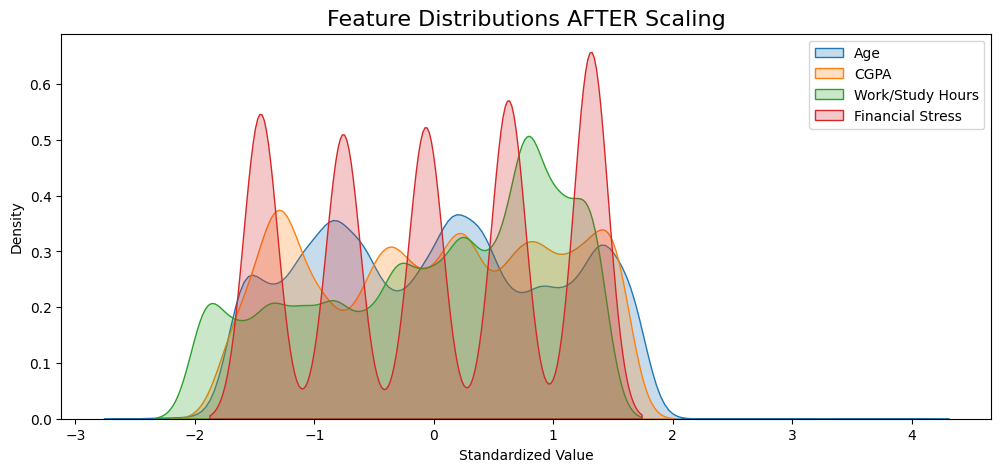

In [4]:
# ==============================================================================
# Step 4: EDA - Visualize Feature Distributions (After Scaling)
# ==============================================================================
plt.figure(figsize=(12, 5))
plt.title("Feature Distributions AFTER Scaling", fontsize=16)
for feature in features_to_plot:
    sns.kdeplot(X_train_scaled[feature], label=feature, fill=True)
plt.xlabel("Standardized Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [5]:
# ==============================================================================
# Step 5: Save the Scaled Data for the Next Handoff
# ==============================================================================

# Save the scaled training and testing feature sets
X_train_scaled.to_csv('X_train_scaled.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)

# Pass along the corresponding labels
y_train.to_csv('y_train_final.csv', index=False)
y_test.to_csv('y_test_final.csv', index=False)

print("\n Handoff successful! Scaled training/testing data has been saved.")


✅ Handoff successful! Scaled training/testing data has been saved.
